# Task 3: Prediction using Decision Tree Algorithm
<br/>

### Problem Statement:
For the given **Iris** Dataset, Create the **Decision Tree Classifier** and visualize it graphically.
<br/>
<br/>




### Author:  MD. Mehedi Hassan Galib  
Department of Civil Engineering  
Rajshahi University of Engineering and Technology (RUET)  
Rajshahi-6204, Bangladesh  
**Email**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**:**  galibmehedihassan@gmail.com  
**LinkedIn**&nbsp;&nbsp; **:** [Mehedi Hassan Galib](https://www.linkedin.com/in/mehedi-hassan-galib)  
**Kaggle**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **:** [Mehedi Hassan Galib](https://www.kaggle.com/galibce003)  
**Github**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**:** [Mehedi Hassan Galib](https://www.github.com/galibce003)  

<br/>
<br/>

## Table of Content
1. Importing necessary modules  
2. Load the dataset  
3. Reconnaissance  
4. Data Preparation  
5. Exploratory Data Analysis  
6. Model Build up  
8. Model Accuracy  
9. Visualize the Tree   

<br/>

## 1. Importing necessary modules

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets
from sklearn import tree

<br/>

## 2. Load the Dataset

In [4]:
iris = datasets.load_iris()

<br/>

## 3. Reconnaissance

##### Keys

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

##### Target Names

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### Feature Names

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<br/>

## 4. Data Preparation

##### Splitting into  Explanatory and Response Variable

In [11]:
X = iris.data
y = iris.target



##### Converting into DataFrame

In [12]:
df = pd.DataFrame(X, columns = iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0




##### Splitting into Train and Test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

<br/>


## 5. Exploratory Data Analysis

##### Pairplot

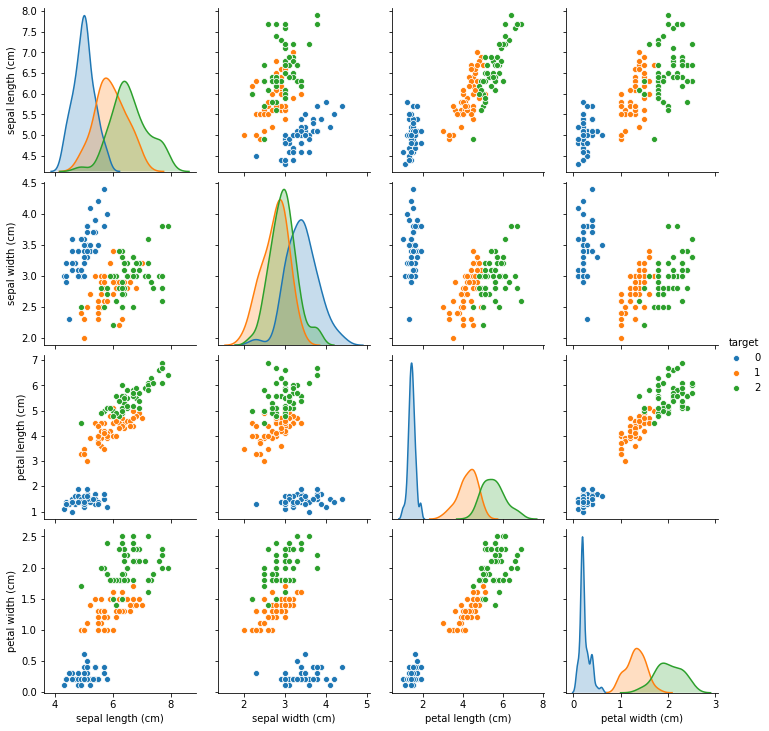

In [13]:
sns.pairplot(df, hue = 'target')
plt.show()

<br/>

##### Correlation in Heatmap

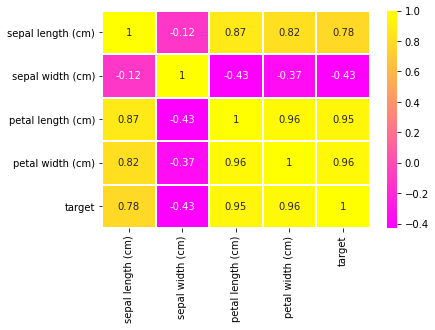

In [53]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot = True, linewidths=1, cmap="spring")

plt.show()

<br/>
<br/>

## 6. Model build up

In [62]:
cf = DecisionTreeClassifier(criterion ='gini', random_state = 1)

# Train the Model
model = cf.fit(X_train, y_train)

# Prediction
y_pred_train = cf.predict(X_train)
y_pred_test = cf.predict(X_test)

<br/>
<br/>

## 7. Model Accuracy

#####  R-squared value

In [63]:
print('Training Acuracy: {}'.format(accuracy_score(y_train, y_pred_train).round(4)))
print('Testing Acuracy: {}'.format(accuracy_score(y_test, y_pred_test).round(4)))

Training Acuracy: 1.0
Testing Acuracy: 0.9667




##### Confusion Metrics

In [50]:
con_mat = metrics.confusion_matrix(y_test, y_pred)
con_mat

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

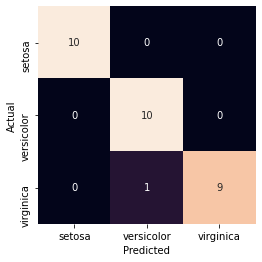

In [56]:
sns.heatmap(con_mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = iris.target_names, yticklabels = iris.target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<br/>


##### Classification_Report

In [68]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<br/>


## 8. Visualize the Tree

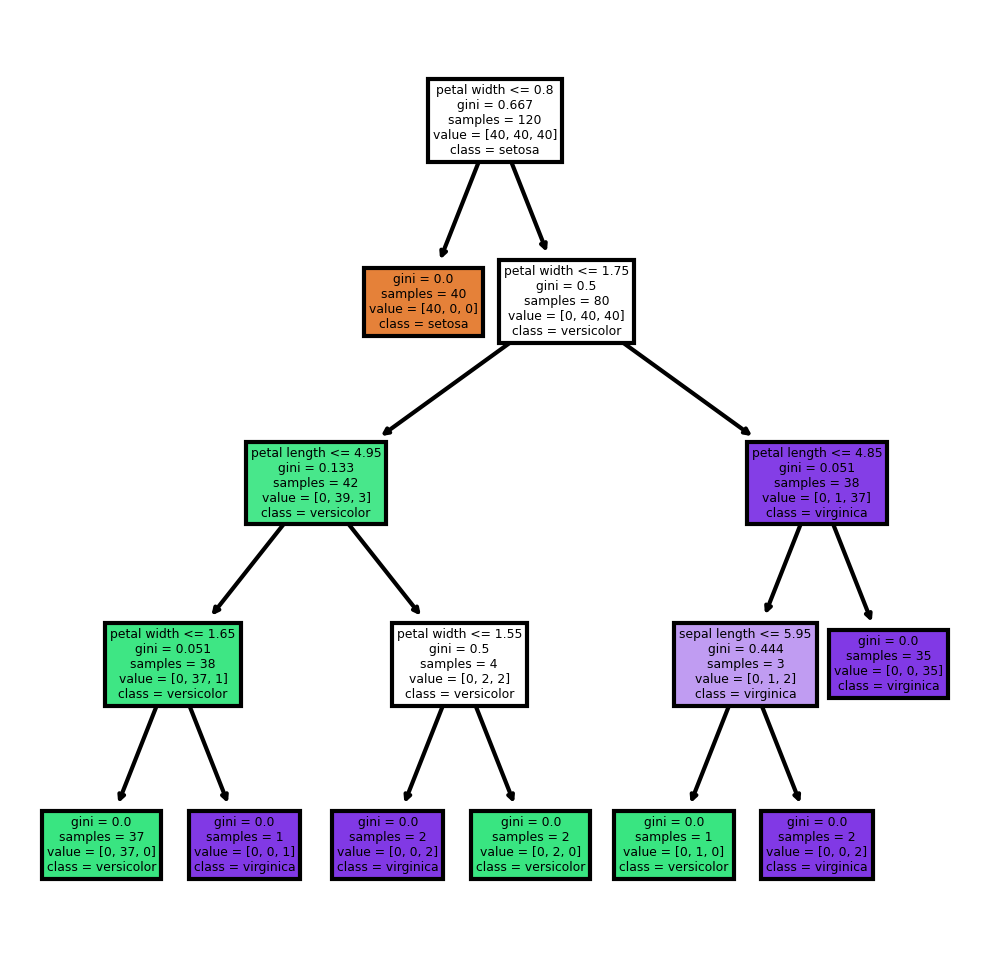

In [72]:
fn=['sepal length','sepal width','petal length','petal width']
cn=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(cf,
           feature_names = fn, 
           class_names=cn,
           filled = True)
plt.show()